In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/Users/carolinecharrier/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_excel('output/df_all_merged.xlsx', sheet_name='Sheet1')
del df['Unnamed: 0']
df.rename(columns={ 0 : 'gini_recalculated'})
df.sort_values('gdpppp',ascending = False)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name_x,population_2004,population_2005,population_2006,...,gini_2011,gini_2012,gini_2013,gini_2014,gini_2015,gini_2016,gini_2017,gini_2018,gini_2019,0
6396,LUX,2008,98,100,65280.22000,73127.00000,Luxembourg,458095.0,465158.0,472637.0,...,32.1,34.3,32.0,31.2,33.8,33.0,34.9,NaN,NaN,29.293516
6361,LUX,2008,63,100,24931.85400,73127.00000,Luxembourg,458095.0,465158.0,472637.0,...,32.1,34.3,32.0,31.2,33.8,33.0,34.9,NaN,NaN,29.293516
6372,LUX,2008,74,100,29634.96000,73127.00000,Luxembourg,458095.0,465158.0,472637.0,...,32.1,34.3,32.0,31.2,33.8,33.0,34.9,NaN,NaN,29.293516
6370,LUX,2008,72,100,28565.10400,73127.00000,Luxembourg,458095.0,465158.0,472637.0,...,32.1,34.3,32.0,31.2,33.8,33.0,34.9,NaN,NaN,29.293516
6369,LUX,2008,71,100,28093.68200,73127.00000,Luxembourg,458095.0,465158.0,472637.0,...,32.1,34.3,32.0,31.2,33.8,33.0,34.9,NaN,NaN,29.293516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11529,COD,2008,31,100,130.13034,303.19305,"Congo, République démocratique du",53068880.0,54785903.0,56578037.0,...,NaN,42.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.399690
11528,COD,2008,30,100,127.91960,303.19305,"Congo, République démocratique du",53068880.0,54785903.0,56578037.0,...,NaN,42.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.399690
11527,COD,2008,29,100,125.39238,303.19305,"Congo, République démocratique du",53068880.0,54785903.0,56578037.0,...,NaN,42.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.399690
11526,COD,2008,28,100,122.52806,303.19305,"Congo, République démocratique du",53068880.0,54785903.0,56578037.0,...,NaN,42.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.399690


## Classification CAH

In [4]:
data_pca = df.loc[(df['quantile'] == 1)][["gdpppp",0]]
data_pca

,gdpppp,0
0,7297.00000,30.462429
100,13220.00000,44.990165
200,5611.00000,26.310763
300,36193.00000,27.827911
400,8101.00000,31.232118
...,...,...
11099,2578.00000,37.748096
11199,3606.00000,35.506751
11299,2224.00000,37.416124
11399,9602.00000,66.977850


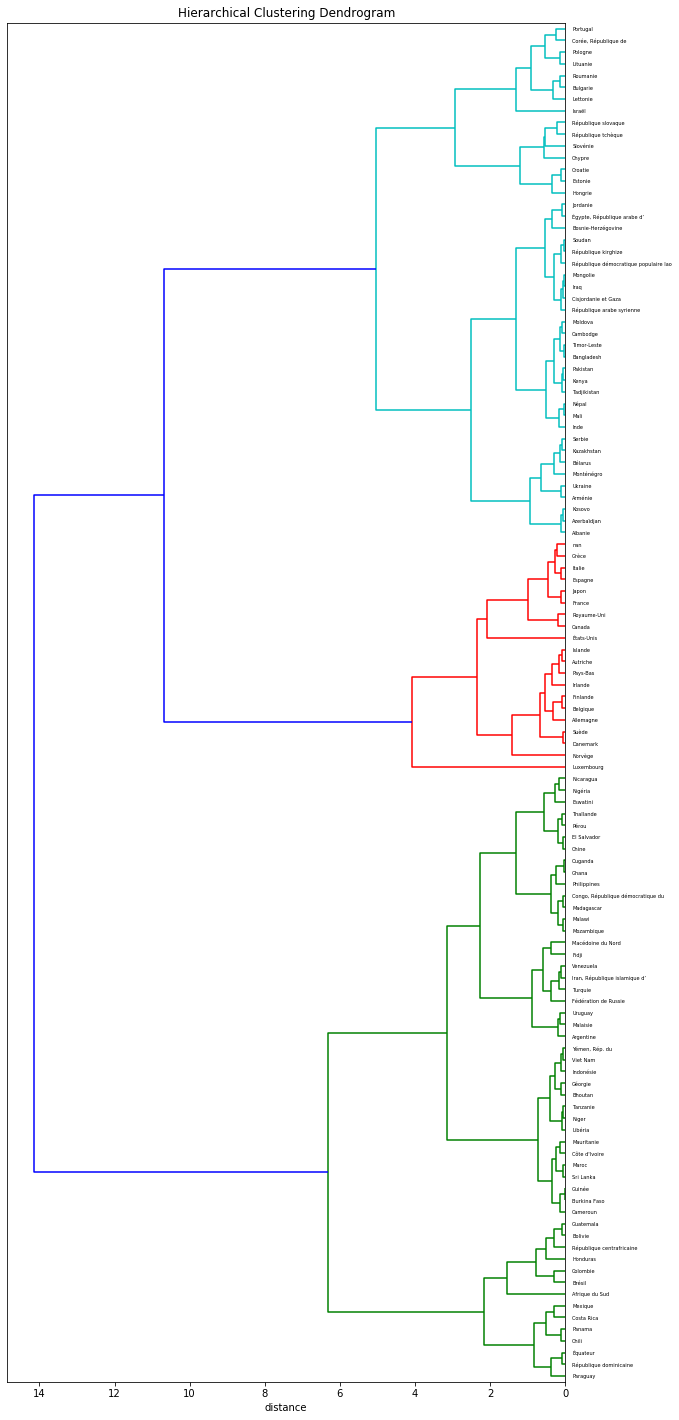

In [5]:
from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

# préparation des données pour le clustering
X = data_pca
names = df.loc[df['quantile'] == 1].country_name_x.values

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

## Kmeans

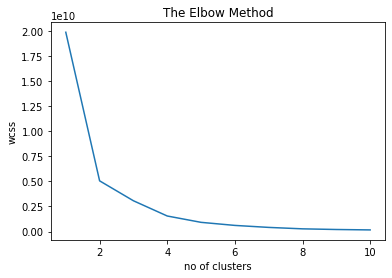

In [6]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters
    
    #Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [7]:
# Nombre de clusters souhaités
n_clust = 4

# Clustering par K-means
km = KMeans(n_clusters= n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

In [8]:
B = pd.DataFrame({"country" : df.loc[(df['quantile'] == 1)].country_name_x,
                         'gdpppp' : data_pca['gdpppp'],
                         'gini' :data_pca[0],
                          "K-means cluster" : clusters})
B

,country,gdpppp,gini,K-means cluster
0,Albanie,7297.00000,30.462429,2
100,Argentine,13220.00000,44.990165,0
200,Arménie,5611.00000,26.310763,2
300,Autriche,36193.00000,27.827911,1
400,Azerbaïdjan,8101.00000,31.232118,2
...,...,...,...,...
11099,Viet Nam,2578.00000,37.748096,2
11199,Cisjordanie et Gaza,3606.00000,35.506751,2
11299,"Yémen, Rép. du",2224.00000,37.416124,2
11399,Afrique du Sud,9602.00000,66.977850,0


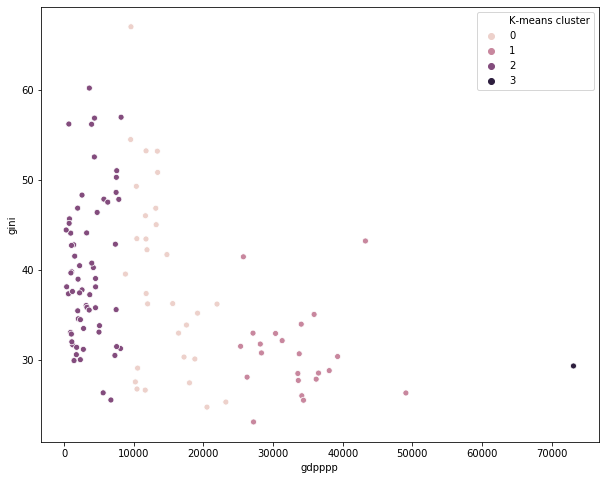

In [9]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=B['gdpppp'], y=B['gini'], hue=B['K-means cluster'])

## Selection des pays 

In [120]:
round(B.groupby('K-means cluster').agg({'K-means cluster':'count','gdpppp':'mean','gini':'mean'}),2)

,K-means cluster,gdpppp,gini
K-means cluster,,,
0,30,13967.07,39.05
1,22,33255.36,30.76
2,63,3481.37,39.99
3,1,73127.00,29.29


In [11]:
B.loc[B['K-means cluster'] ==0].sort_values(['gdpppp','gini'])

,country,gdpppp,gini,K-means cluster
6899,Macédoine du Nord,8809.0,39.504054,0
1200,Brésil,9559.0,54.449368,0
11399,Afrique du Sud,9602.0,66.977850,0
9399,Serbie,10234.0,27.522418,0
2100,Costa Rica,10374.0,49.253343,0
4600,"Iran, République islamique d’",10446.0,43.437416,0
5300,Kazakhstan,10469.0,26.734372,0
7099,Monténégro,10556.0,29.058285,0
1000,Bélarus,11651.0,26.612521,0
10799,Uruguay,11682.0,45.981052,0


**Description des clusters :**

- Cluster  0 : Pays pauvres, indice gdp ppp faible et indice de gini fort
- Cluster  1 : Pays européens, indice gdp ppp très fort et indice de gini faible
- Cluster  2 : Pays entre 0 et 1, indice gdp ppp moyen et indice de gini fort
- Cluster  4 : Luxembourg

In [12]:
country_selected = ['France', 'Royaume-Uni', 'Finlande','Argentine','Panama','Luxembourg','Kosovo']
A = df.loc[df['country_name_x'].isin(country_selected)]
A = A.loc[:,['country','country_name_x','quantile','income']]
A = pd.pivot_table(A, values='income', index=['quantile'],
                    columns=['country'], aggfunc=np.min)
A
#country_selected = set(df.loc[df['country'].isin(country_selected)].country)

country,ARG,FIN,FRA,GBR,LUX,PAN,XKX
quantile,,,,,,,
1,254.08942,3248.9075,2958.3040,1416.5803,5780.8374,210.56883,437.89370
2,470.50150,4653.0923,4412.6753,3946.3218,7315.2686,327.76990,508.17133
3,623.45420,5407.3750,4939.6350,4897.4556,7891.2456,406.44336,591.82820
4,734.97455,5953.7940,5422.9165,5660.9917,8312.0310,490.30154,668.00000
5,832.31850,6373.6870,5906.5376,6283.2354,8945.6380,556.52760,730.40220
...,...,...,...,...,...,...,...
96,16618.87300,32700.0800,39873.5100,48890.8160,53724.6300,17034.96700,5155.36470
97,18226.73000,34744.2230,43693.0350,52429.4800,58382.3120,19213.08800,5689.52930
98,20528.30500,37973.2580,49489.5820,56776.4960,65280.2200,22991.97500,6233.73930


Text(0.5, 1.0, 'Revenu par classe en fonction des quantiles')

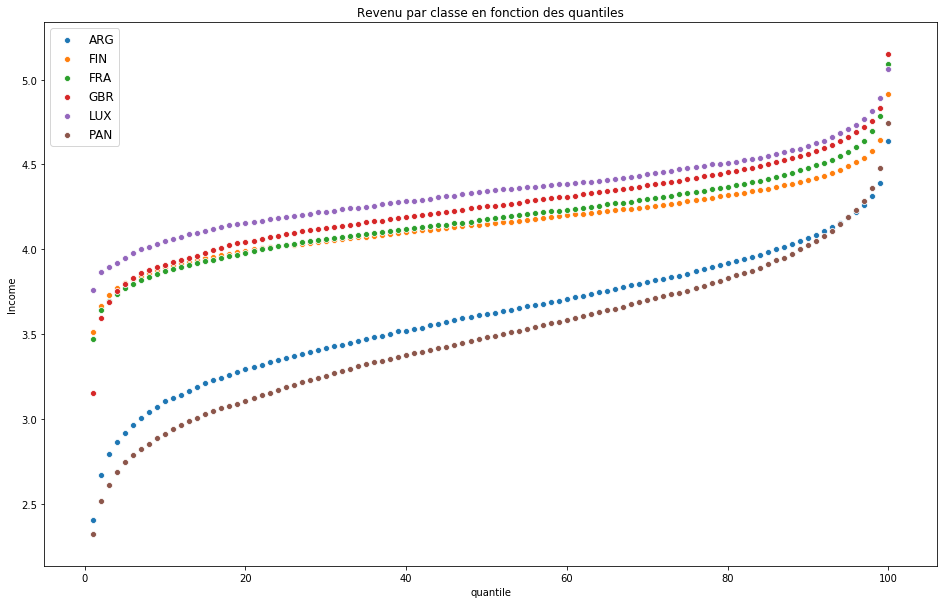

In [124]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)


sns.scatterplot(x=A.index, y=np.log10(A['ARG']),palette=cmap) #bleu
sns.scatterplot(x=A.index, y=np.log10(A['FIN']),palette=cmap) # orange
sns.scatterplot(x=A.index, y=np.log10(A['FRA']),palette=cmap) # vert
sns.scatterplot(x=A.index, y=np.log10(A['GBR']),palette=cmap) # rouge
sns.scatterplot(x=A.index, y=np.log10(A['LUX']),palette=cmap) # violet
sns.scatterplot(x=A.index, y=np.log10(A['PAN']),palette=cmap) # marron

handles = A.columns
plt.legend(handles, prop = {'size': 12}, loc='best')
plt.gcf().set_size_inches(16, 10)
plt.xlabel("quantile")
plt.ylabel('Income')
plt.title('Revenu par classe en fonction des quantiles',fontsize=12)




In [63]:
#C = df.loc[df['country_name_x'].isin(country_selected)]
#C.loc[:,['country','country_name_x','quantile','income']]
#sns.scatterplot(x=C['quantile'], y=np.log10(C['income']), hue=['country'],palette=cmap) #bleu


## Courbe de Lorenz


In [15]:
def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

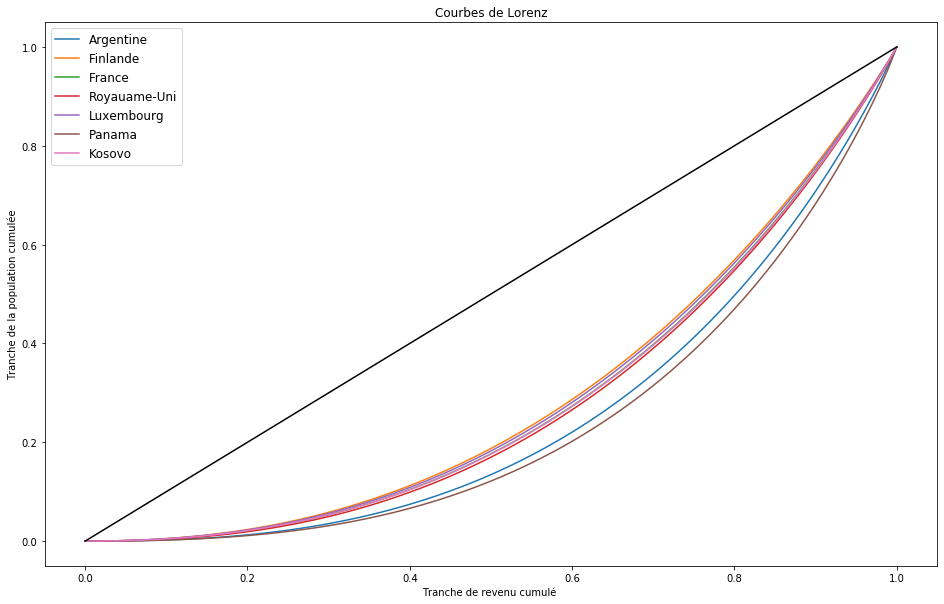

In [16]:
A_cumsum = A.cumsum()


lorenz_curve = lorenz(A_cumsum['ARG'].values)
lorenz_curve2 = lorenz(A_cumsum['FIN'].values)
lorenz_curve3 = lorenz(A_cumsum['FRA'].values)
lorenz_curve4 = lorenz(A_cumsum['GBR'].values)
lorenz_curve5 = lorenz(A_cumsum['LUX'].values)
lorenz_curve6 = lorenz(A_cumsum['PAN'].values)
lorenz_curve7 = lorenz(A_cumsum['XKX'].values)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve, label = 'Argentine')
plt.plot(np.linspace(0.0, 1.0, lorenz_curve2.size), lorenz_curve2, label ='Finlande')
plt.plot(np.linspace(0.0, 1.0, lorenz_curve3.size), lorenz_curve3, label ='France')
plt.plot(np.linspace(0.0, 1.0, lorenz_curve4.size), lorenz_curve4, label ='Royauame-Uni')
plt.plot(np.linspace(0.0, 1.0, lorenz_curve5.size), lorenz_curve5, label ='Luxembourg')
plt.plot(np.linspace(0.0, 1.0, lorenz_curve6.size), lorenz_curve6, label ='Panama')
plt.plot(np.linspace(0.0, 1.0, lorenz_curve7.size), lorenz_curve7, label ='Kosovo')

# plot the straight line perfect equality curve
plt.plot([0,1], [0,1], color ='black')
plt.xlabel("Tranche de revenu cumulé ")
plt.ylabel("Tranche de la population cumulée")
plt.title("Courbes de Lorenz")
plt.legend(prop = {'size': 12})
plt.gcf().set_size_inches(16, 10)
plt.show()


## Evolution des indices de Gini au cours du temps 


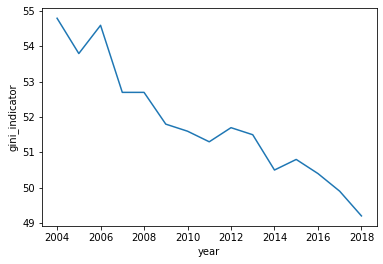

In [60]:
# Panama
D = df.loc[(df['country_name_y'] =='Panama') & (df['quantile'] ==1)]
D = D.iloc[:,15:31].T.reset_index()
D.columns = ['gini_year', 'gini_indicator']
D['year'] = ['country_name',2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
D = D.iloc[1:16,1:3]
D['gini_indicator'] = pd.to_numeric(D['gini_indicator'])



sns.lineplot(x=D['year'], y=D['gini_indicator'], data=D)

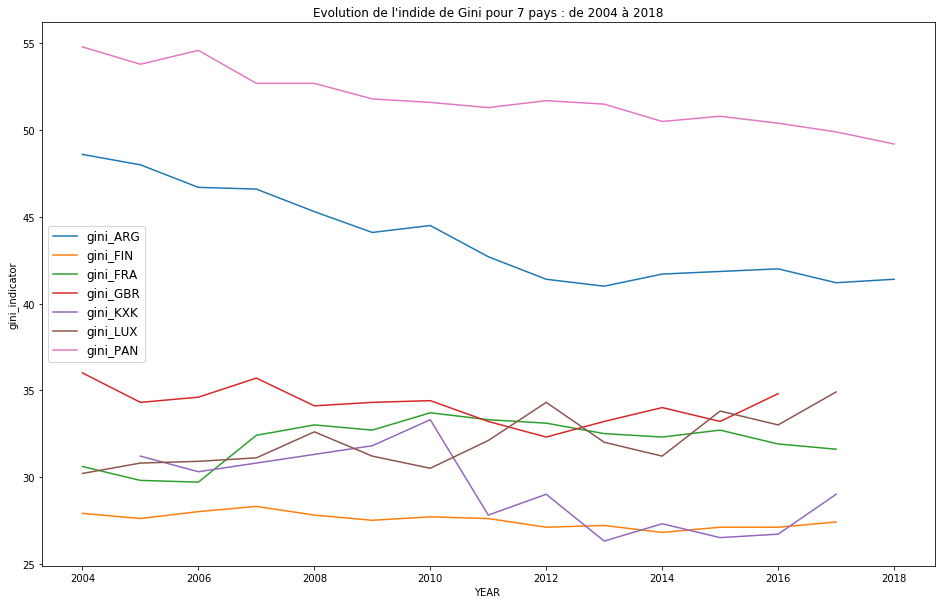

In [95]:
E = df.loc[(df['country_name_x'].isin(country_selected)) & (df['quantile'] ==1)]
E = E.iloc[:,15:31].T.reset_index()
E.columns = ['gini_year', 'gini_ARG','gini_FIN','gini_FRA','gini_GBR','gini_KXK','gini_LUX','gini_PAN']
E['year'] = ['country_name',2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
E = E.iloc[1:16,1:9]
E['gini_ARG'] = pd.to_numeric(E['gini_ARG'])
E['gini_FIN'] = pd.to_numeric(E['gini_FIN'])
E['gini_FRA'] = pd.to_numeric(E['gini_FRA'])
E['gini_GBR'] = pd.to_numeric(E['gini_GBR'])
E['gini_KXK'] = pd.to_numeric(E['gini_KXK'])
E['gini_LUX'] = pd.to_numeric(E['gini_LUX'])
E['gini_PAN'] = pd.to_numeric(E['gini_PAN'])


sns.lineplot(x=E['year'], y=E['gini_ARG'], data=E)
sns.lineplot(x=E['year'], y=E['gini_FIN'], data=E)
sns.lineplot(x=E['year'], y=E['gini_FRA'], data=E)
sns.lineplot(x=E['year'], y=E['gini_GBR'], data=E)
sns.lineplot(x=E['year'], y=E['gini_KXK'], data=E)
sns.lineplot(x=E['year'], y=E['gini_LUX'], data=E)
sns.lineplot(x=E['year'], y=E['gini_PAN'], data=E)

# plot the straight line perfect equality curve
handles = E.columns
plt.xlabel("YEAR ")
plt.ylabel("gini_indicator")
plt.title("Evolution de l'indide de Gini pour 7 pays : de 2004 à 2018")
plt.legend(handles, prop = {'size': 12}, loc='best')
plt.gcf().set_size_inches(16, 10)
plt.show()


## Classement des pays par indice de Gini

In [26]:
df['gini_mean'] = df.iloc[:,15:33].mean(axis=1)

In [128]:
gini_rank = df.loc[df['quantile'] == 1].sort_values('gini_mean',ascending = True)
gini_rank = gini_rank.reset_index()
print('TOP 5 : Pays indice de Gini faible')
print(gini_rank.loc[:,['country_name_x','gini_mean']].head())
print('-----'*10)
print('TOP 5 : Pays indice de Gini élevé')
print(gini_rank.loc[:,['country_name_x','gini_mean']].tail())
print('-----'*10)
print('Classement des pays étudiés')
print(gini_rank.loc[gini_rank['country_name_x'].isin(country_selected),['country_name_x','gini_mean']])


TOP 5 : Pays indice de Gini faible
        country_name_x  gini_mean
0             Slovénie  24.764875
1              Ukraine  26.088373
2   République tchèque  26.172426
3  République slovaque  26.472992
4             Danemark  26.959141
--------------------------------------------------
TOP 5 : Pays indice de Gini élevé
                country_name_x  gini_mean
111                  Guatemala  53.243091
112                     Brésil  53.943291
113                   Honduras  54.347917
114  République centrafricaine  56.186607
115             Afrique du Sud  64.235570
--------------------------------------------------
Classement des pays étudiés
    country_name_x  gini_mean
7         Finlande  27.519048
14          Kosovo  29.220622
29      Luxembourg  31.859568
30          France  32.147308
44     Royaume-Uni  34.145586
93       Argentine  44.012678
109         Panama  51.905731
